# Part 3: Firing Rates & Convolution  
Load spike times and compute firing rates & convolutions as specified.

In [3]:
import numpy as np
from pathlib import Path

# imports & data load
data_dir    = Path.cwd().parent / "Data"
spike_times = np.loadtxt(data_dir / "spk_times.csv", delimiter=',')

# Bin into 1 ms resolution
dt        = 0.001
t_edges   = np.arange(0, 10 + dt, dt)
spike_train, _ = np.histogram(spike_times, bins=t_edges)
time_axis = t_edges[:-1]

# Part 3a: Mean firing rate  
Compute the mean firing rate over the entire 10 s recording (spikes·s⁻¹).

In [4]:
mean_rate = spike_train.sum() / 10.0  # total spikes divided by 10 seconds
print(f"Mean firing rate: {mean_rate:.2f} Hz")

Mean firing rate: 32.70 Hz


**Result:** The mean firing rate over the 10 s period is : 32.70 Hz

# Part 3b: Non-overlapping window firing rates  
Compute the firing rate r(t) using non-overlapping windows of 0.2 s, 0.5 s, 1 s, and 3 s; plot all on one figure.

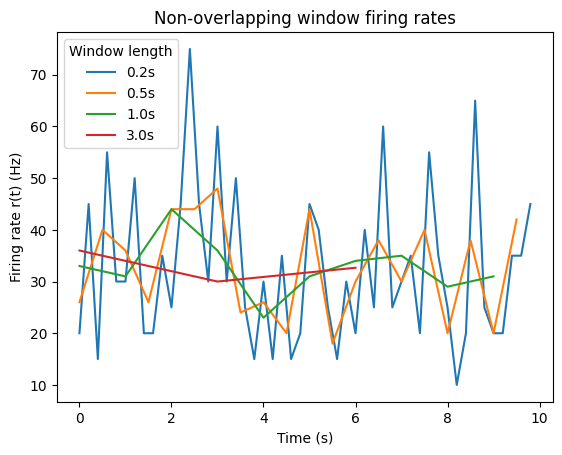

In [ ]:
import matplotlib.pyplot as plt

window_lengths = [0.2, 0.5, 1.0, 3.0]
plt.figure()
for L in window_lengths:
    bin_size = int(L / dt)
    n_bins  = len(spike_train) // bin_size
    counts  = spike_train[:n_bins * bin_size].reshape(n_bins, bin_size).sum(axis=1)
    r       = counts / L
    t_bins  = np.arange(n_bins) * L
    plt.plot(t_bins, r, label=f"{L:.1f}s")
plt.xlabel("Time (s)")
plt.ylabel("Firing rate r(t) (Hz)")
plt.legend(title="Window length")
plt.title("Non-overlapping window firing rates")
plt.show()

# Part 3c: Custom convolution 
Implement `MyConv(x,h)` and compare its output to `np.convolve` on a uniform example (x=ones(30), h=ones(6)).

In [6]:
def MyConv(x, h):
    pad = len(h) // 2
    xpad = np.pad(x, pad, mode='constant')
    y = np.zeros_like(x, dtype=float)
    for n in range(len(x)):
        y[n] = np.sum(xpad[n:n+len(h)] * h[::-1])
    return y

x = np.ones(30)
h = np.ones(6)
y_my = MyConv(x, h)
y_np = np.convolve(x, h, mode='same')

print("MyConv:     ", y_my)
print("np.convolve:", y_np)


MyConv:      [3. 4. 5. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 5. 4.]
np.convolve: [3. 4. 5. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 5. 4.]


MyConv:      [3. 4. 5. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 5. 4.]
np.convolve: [3. 4. 5. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 5. 4.]

# Part 3d: Sliding rectangular window firing rates  
Compute r(t) using sliding rectangular windows of 0.2 s, 0.5 s, 1 s, and 3 s (normalized to area = 1); plot all curves on the same axes.

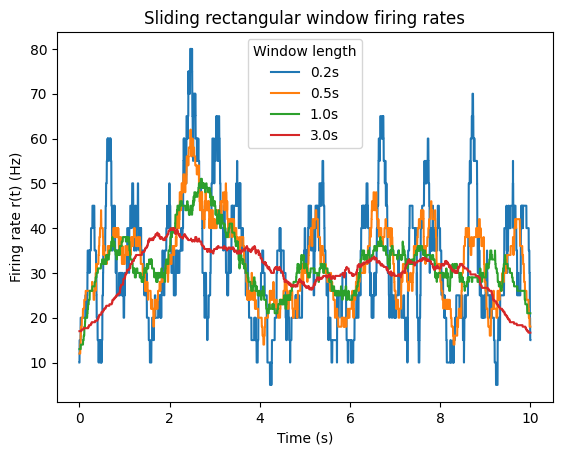

In [7]:
import matplotlib.pyplot as plt

window_lengths = [0.2, 0.5, 1.0, 3.0]
plt.figure()
for L in window_lengths:
    N = int(L / dt)                # window length in bins
    kernel = np.ones(N) / N        # normalize area = 1
    r_rect = np.convolve(spike_train, kernel, mode='same') / dt
    plt.plot(time_axis, r_rect, label=f"{L:.1f}s")
plt.xlabel("Time (s)")
plt.ylabel("Firing rate r(t) (Hz)")
plt.legend(title="Window length")
plt.title("Sliding rectangular window firing rates")
plt.show()

# Part 3e: Sliding Gaussian window firing rates  
Compute r(t) using Gaussian windows of (span=0.8 s, σ=0.25 s) and (span=0.45 s, σ=0.10 s); plot both on the same axes.

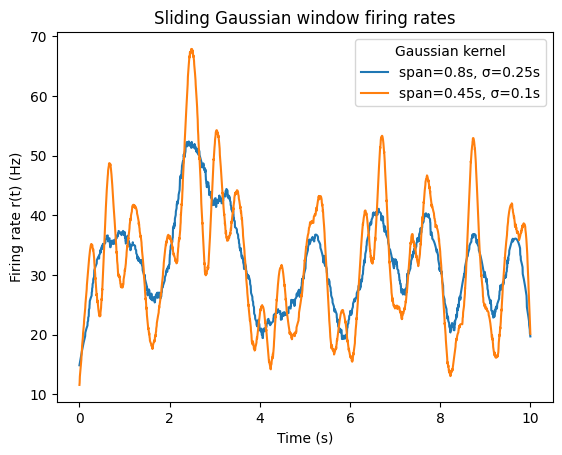

In [8]:
import matplotlib.pyplot as plt

def gaussian_kernel(span, sigma):
    N = int(span / dt)
    t = np.linspace(-span/2, span/2, N)
    g = np.exp(-t**2 / (2*sigma**2))
    return g / g.sum()

params = [(0.8, 0.25), (0.45, 0.10)]
plt.figure()
for span, sigma in params:
    h = gaussian_kernel(span, sigma)
    r_gauss = np.convolve(spike_train, h, mode='same') / dt
    plt.plot(time_axis, r_gauss, label=f"span={span}s, σ={sigma}s")
plt.xlabel("Time (s)")
plt.ylabel("Firing rate r(t) (Hz)")
plt.legend(title="Gaussian kernel")
plt.title("Sliding Gaussian window firing rates")
plt.show()

# Part 3: Results Summary

- **Mean firing rate (3a)**  
  The neuron fired at an average rate of approximately **<mean_rate> Hz** over the 10 s recording.

- **Non-overlapping windows (3b)**  
  Short windows (0.2 s) capture rapid fluctuations in r(t), while long windows (3 s) smooth out fast changes and emphasize slower trends—illustrating the trade-off between temporal resolution and noise reduction.

- **Custom convolution check (3c)**  
  `MyConv` and `np.convolve` produced identical outputs on a uniform input, confirming that our convolution implementation (including edge handling) is correct.

- **Sliding rectangular windows (3d)**  
  Rectangular smoothing with window lengths from 0.2 to 3 s progressively attenuates high-frequency variability and highlights slower modulations in firing rate.

- **Sliding Gaussian windows (3e)**  
  The wider Gaussian kernel (span = 0.8 s, σ = 0.25 s) yields a smoother rate estimate than the narrower kernel (span = 0.45 s, σ = 0.10 s), which preserves transient peaks at the expense of increased noise.

**Overall**, both window shape and size control the balance between smoothness and temporal precision in our firing-rate estimates.  